# Goal of the ML project 
- Dataset: gira bike sharing system data

- Time series and  Forecasting
- Apply techniques:
    - LSVM
    - ARIMA/ Linear Regression

# Data Selection

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Import Functions

### dslabs_functions

In [2]:
%run "scripts/dslabs_functions.py"

### data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


## Load Files 

### Holidays Calendar in Lisbon 2022

In [54]:
filepath_holidays_lx_2022 = r'data/holidays-lisbon-2022.xlsx'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'
df_holidays_lx = pd.read_excel(filepath_holidays_lx_2022, na_values="")
df_holidays_lx.rename(columns={'holiday_lisbon': 'is_holiday_lisbon'}, inplace=True)
display(df_holidays_lx.head())

,date,is_holiday_lisbon
0,2022-01-01,1
1,2022-03-01,1
2,2022-04-15,1
3,2022-04-17,1
4,2022-04-25,1


### Weather file - Lisbon
- Weather info, hourly, from Lisbon for the year 2022
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here - https://open-meteo.com/en/docs/historical-weather-api#latitude=38.7167&longitude=-9.1333&start_date=2019-01-01&end_date=2019-12-31&hourly=&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timezone=Europe%2FLondon&models=

    

In [55]:
filepath_weather_lx_h = r'data/open-meteo-lisbon-hourly-2022.csv'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'

In [56]:
df_weather_lx_h = pd.read_csv(filepath_weather_lx_h,sep=';', na_values="")
display(df_weather_lx_h.head())

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2022-01-01T00:00,12.2,86,10.0,11.3,0.0,0.0,0.0,0.0,1,...,1019.5,21,0,0,60,6.5,9.2,56,129,11.5
1,2022-01-01T01:00,11.4,89,9.7,10.4,0.0,0.0,0.0,0.0,3,...,1019.2,96,0,0,96,6.1,9.0,50,119,10.8
2,2022-01-01T02:00,11.9,90,10.3,11.2,0.0,0.0,0.0,0.0,3,...,1019.2,99,0,0,99,5.6,10.1,50,107,10.4
3,2022-01-01T03:00,11.8,90,10.3,11.0,0.0,0.0,0.0,0.0,2,...,1019.0,51,0,0,51,6.7,12.9,54,103,12.2
4,2022-01-01T04:00,11.2,91,9.8,10.3,0.0,0.0,0.0,0.0,3,...,1018.9,99,0,0,99,6.1,12.4,45,100,11.9


### Main file - Gira bike sharing system data
- Data on each gira stations in Lisbon, regarding available capacity by minute, between the period of 1/1/22 and 31/6/22.
    - Contains info on:
        - desig_comercial - Name of the gira bike station in Lisbon
        - num_bicicletas - Number of docked bikes in the station (station load)
        - num_docas - number of docks in the station (station capacity)
        - position - longitude and latitute points of the gira bike stations
        - entity_ts - time stamp of each record regarding the station load at each minute
        - estado - statu of the gira bike station, can be active or in repair
    - Data provided on dados.cm-lisboa website
        - link here - https://dados.cm-lisboa.pt/dataset/gira-bicicletas-de-lisboa-historico

In [92]:
filepath = 'data/estacoes-gira-1-semestre-2022.csv'

test_data = False
# Load the data

if test_data:
    df = pd.read_csv(filepath, na_values="")
    df: Dataframe = df.sample(frac = 0.1,sep = ',', replace = False)
else:
    df = pd.read_csv(filepath, sep =',', na_values="")
display(df)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active
3,103 - Jardim da Água,16,20,"{""coordinates"":[-9.095019,38.761218],""type"":""P...",2022-01-01T13:38:04.204Z,active
4,415 - Av. Duque de Ávila / Av. Conde Valbom,9,20,"{""coordinates"":[-9.148443,38.735188],""type"":""P...",2022-01-01T13:38:04.179Z,active
...,...,...,...,...,...,...
1555391,486 - Rua Hermano Neves / Rua José Escada,2,14,"{""coordinates"":[-9.16985,38.75954],""type"":""Poi...",2022-06-30T10:33:28.035Z,active
1555392,417 - Av. Duque de Ávila / Jardim Arco Do Cego,9,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-06-30T10:33:25.612Z,active
1555393,449 - Av. 5 de Outubro / Rua da Cruz Vermelha,0,14,"{""coordinates"":[-9.150085,38.746836],""type"":""P...",2022-06-30T10:13:36.074Z,active
1555394,479 - Rua Professor Oliveira Marques,13,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-30T10:13:37.004Z,active


In [57]:
import pandas as pd

# File paths
filepaths = ['data/estacoes-gira-1-semestre-2022.csv', 'data/estacoes-gira-2-semestre-2022.csv']

test_data = True

# Load the data
df_list = [pd.read_csv(file, sep=',', na_values="") for file in filepaths]

df = pd.concat(df_list, ignore_index=True)

# Sample if test_data is True
if test_data:
    df = df.sample(frac=0.02, replace=False)

display(df)
display(df.shape)



,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
3322360,221 - Rua do Crucifixo / Rua São Nicolau,3,15,"{""coordinates"":[-9.138828,38.710191],""type"":""P...",2022-10-08T13:41:12.000Z,active
904939,461 - Rua Professora Teresa Ambrósio,5,32,"{""coordinates"":[-9.155564,38.749141],""type"":""P...",2022-06-05T02:32:25.915Z,active
948859,463 - Campo Grande / Av. da Igreja,4,10,"{""coordinates"":[-9.14951,38.75243],""type"":""Poi...",2022-06-07T09:57:34.878Z,active
707032,406 - Praça Duque de Saldanha,4,17,"{""coordinates"":[-9.145341,38.734247],""type"":""P...",2022-06-12T19:59:11.899Z,active
2999123,216 - Praça D. Luís I,5,21,"{""coordinates"":[-9.14655,38.70663],""type"":""Poi...",2023-01-27T00:58:06.000Z,active
...,...,...,...,...,...,...
2214358,403 - Av. Fontes Pereira de Melo,1,20,"{""coordinates"":[-9.146522,38.731698],""type"":""P...",2022-10-01T01:24:23.000Z,active
3613266,520 - Lispolis,1,23,"{""coordinates"":[-9.182513,38.766995],""type"":""P...",2022-10-30T18:51:12.000Z,active
2089830,478 - Alameda da Universidade / Faculdade de L...,5,32,"{""coordinates"":[-9.15717,38.75359],""type"":""Poi...",2022-08-26T00:33:23.364Z,active
3713053,225 - Martim Moniz,11,16,"{""coordinates"":[-9.13694,38.71526],""type"":""Poi...",2022-11-02T14:51:41.000Z,active


(78766, 6)

# Data Cleaning/Transformation

- Feature Engineering steps
    - In this project, we have the main dataset (df) with capacity data for each gira bike station. In order to enrich the analysis, we decided to cross join this data with hourly meteorological conditions (from openMeteo) in Lisbon, to understand how the weather may influence the gira bike stations load over time. Lisbon's Holiday data was also included.

- Remove data from 2023 in the df main
- Add new features
    - Add holiday col
        - Add column is_holiday(0 or 1) that indicates if the day corresponds to a holiday date in 2022.
    -   Spacial:
        - longitude of the gira bike station
        - latitude of the gira bike station
    - Weather
        - weather_desc: The weather conditions during the ride (e.g., Overcast, Clear sky, Rainy).
        rain: The amount of rain (in mm) during the ride.
        - temperature: The temperature (in °C) during the ride.
    - Create col station load target:
        - station_target_load hourly (numbicicletas / numdocas) * 100
    - station_A_load hourly
    - station_B_load hourly
    - station_C_load hourly
    - station_D_load hourly    

- Agreggation:
    - Aggregate the data hourly to have less rows
- Rename original cols from main df - citi bike
- Remove id columns: make sure to remove id columns from the df
- Create dataset for data exploration:
    - normal dataset with
- Create dataset for time forecasting (1):
    - trasnform the dataset
    - create taget columns (station load for target station)
    - keep external variables (station_a, station_b, station_c, weather_info, is_holiday)
- Create dataset for time forecasting (2):
    - trasnform the dataset
    - create taget columns (station load for target station)
    - remove external variables

## Remove data from 2023 in the main df

In [58]:
# Convert 'entity_ts' column in df to datetime
df['entity_ts'] = pd.to_datetime(df['entity_ts'].str[:-5])  # Remove os últimos 5 caracteres se necessário
df = df[df['entity_ts'].dt.year != 2023]
df.shape

(66923, 6)

## Remove rows where numbicicletas > num docas - errors
    - We found some small cases where we have more numbiciletas than numdocas which is not possible. These are probably errors in the logs measures by the gira app. We will remove these cases

In [59]:
df = df[df['numbicicletas'] <= df['numdocas']]
df.shape

(66920, 6)

## Add Holiday column to main df

|

In [60]:
# Convert 'date' column in df_holidays_lx to datetime
df_holidays_lx['date'] = pd.to_datetime(df_holidays_lx['date'])


# Extract hour and day from 'entity_ts'
df['entity_ts_hour'] = df['entity_ts'].dt.floor('H')  # Extrai a hora (arredondada para baixo)
df['entity_ts_day'] = df['entity_ts'].dt.normalize()  # Extrai a data (sem horário)

# Realize o merge
df = df.merge(df_holidays_lx, left_on='entity_ts_day', right_on='date', how='left')
df['is_holiday_lisbon'] = df['is_holiday_lisbon'].fillna(0)

df.drop(columns=['date'], inplace=True)

# Exiba o DataFrame resultante
display(df.head())

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon
0,221 - Rua do Crucifixo / Rua São Nicolau,3,15,"{""coordinates"":[-9.138828,38.710191],""type"":""P...",2022-10-08 13:41:12,active,2022-10-08 13:00:00,2022-10-08,0.0
1,461 - Rua Professora Teresa Ambrósio,5,32,"{""coordinates"":[-9.155564,38.749141],""type"":""P...",2022-06-05 02:32:25,active,2022-06-05 02:00:00,2022-06-05,0.0
2,463 - Campo Grande / Av. da Igreja,4,10,"{""coordinates"":[-9.14951,38.75243],""type"":""Poi...",2022-06-07 09:57:34,active,2022-06-07 09:00:00,2022-06-07,0.0
3,406 - Praça Duque de Saldanha,4,17,"{""coordinates"":[-9.145341,38.734247],""type"":""P...",2022-06-12 19:59:11,active,2022-06-12 19:00:00,2022-06-12,0.0
4,408 - Praça Duque de Saldanha,0,10,"{""coordinates"":[-9.144117,38.733749],""type"":""P...",2022-06-08 00:16:25,active,2022-06-08 00:00:00,2022-06-08,0.0


In [61]:
df['is_holiday_lisbon'].value_counts()

is_holiday_lisbon
0.0    64034
1.0     2886
Name: count, dtype: int64

## Add longituded and latitude of the station column

In [62]:
import json
# Convert the position column to JSON format and extract lat and long
df['position'] = df['position'].apply(json.loads)

df['gira_station_long'] = df['position'].apply(lambda x: x['coordinates'][0])
df['gira_station_lat'] = df['position'].apply(lambda x: x['coordinates'][1])
df.head()


,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat
0,221 - Rua do Crucifixo / Rua São Nicolau,3,15,"{'coordinates': [-9.138828, 38.710191], 'type'...",2022-10-08 13:41:12,active,2022-10-08 13:00:00,2022-10-08,0.0,-9.138828,38.710191
1,461 - Rua Professora Teresa Ambrósio,5,32,"{'coordinates': [-9.155564, 38.749141], 'type'...",2022-06-05 02:32:25,active,2022-06-05 02:00:00,2022-06-05,0.0,-9.155564,38.749141
2,463 - Campo Grande / Av. da Igreja,4,10,"{'coordinates': [-9.14951, 38.75243], 'type': ...",2022-06-07 09:57:34,active,2022-06-07 09:00:00,2022-06-07,0.0,-9.149510,38.752430
3,406 - Praça Duque de Saldanha,4,17,"{'coordinates': [-9.145341, 38.734247], 'type'...",2022-06-12 19:59:11,active,2022-06-12 19:00:00,2022-06-12,0.0,-9.145341,38.734247
4,408 - Praça Duque de Saldanha,0,10,"{'coordinates': [-9.144117, 38.733749], 'type'...",2022-06-08 00:16:25,active,2022-06-08 00:00:00,2022-06-08,0.0,-9.144117,38.733749


## Add weather info cols in main df

- Weather info, hourly, from Lisbon for the year 2022
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here -https://open-meteo.com/en/docs/historical-weather-api#latitude=38.7167&longitude=-9.1333&start_date=2019-01-01&end_date=2019-12-31&hourly=&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timezone=Europe%2FLondon&models=

Info on dataset columns:
- snowfall = 5 cm (new snow that felt in a specific hour)
- snow_depth = 15 cm (total snow accumulated in the floor in a specific hour)
- rain_sum (mm) = Total sum of liquid rain (excludes snow, hail, etc.).
- precipitation_sum (mm) = Total sum of all precipitation (includes rain, snow, hail, etc.)
- cloud_cover (%): Represents the total percentage of the sky covered by clouds at all altitudes, without distinguishing between low, middle, or high
- cloud_cover_low (%): Represents the percentage of cloud cover specifically at low altitudes, typically below 2 km.- cloud_cover_mid (%) = Percentage of cloud cover at mid altitudes (typically between 2 km and 6 km).
- cloud_cover_high (%) = Percentage of cloud cover at high altitudes (typically above 6 km).
- wind_speed_10m (km/h)= Represents the wind speed measured at 10 meters above ground level, in kilometers per hour (km/h). This is typically used to assess the strength of the wind near the surface.
- weather_code (wmo code)	- World meteorological code for that hour 
    - cloudly, sunny, mist

    

In [18]:
df_weather_lx_h.columns

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'weather_code (wmo code)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'],
      dtype='object')

In [74]:
df_weather_lx_h.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2022-01-01T00:00,12.2,86,10.0,11.3,0.0,0.0,0.0,0.0,1,...,1019.5,21,0,0,60,6.5,9.2,56,129,11.5
1,2022-01-01T01:00,11.4,89,9.7,10.4,0.0,0.0,0.0,0.0,3,...,1019.2,96,0,0,96,6.1,9.0,50,119,10.8
2,2022-01-01T02:00,11.9,90,10.3,11.2,0.0,0.0,0.0,0.0,3,...,1019.2,99,0,0,99,5.6,10.1,50,107,10.4
3,2022-01-01T03:00,11.8,90,10.3,11.0,0.0,0.0,0.0,0.0,2,...,1019.0,51,0,0,51,6.7,12.9,54,103,12.2
4,2022-01-01T04:00,11.2,91,9.8,10.3,0.0,0.0,0.0,0.0,3,...,1018.9,99,0,0,99,6.1,12.4,45,100,11.9


In [63]:
#Let's use the hourly dataset to have detailed weather info

#convert time to datetime format
df_weather_lx_h['time'] = pd.to_datetime(df_weather_lx_h['time'])

#drop meteo columns that are not relevant for the analysis
df_weather_lx_h.drop(columns = [
    'apparent_temperature (°C)',
    'relative_humidity_2m (%)',
    'dew_point_2m (°C)',
    'precipitation (mm)',
    'wind_speed_100m (km/h)',
    'snow_depth (m)',
    'snowfall (cm)',
    'cloud_cover_low (%)',
    'cloud_cover (%)',
    'cloud_cover_mid (%)',
    'cloud_cover_high (%)',
    'pressure_msl (hPa)',
    'surface_pressure (hPa)',
    'wind_direction_10m (°)',
    'wind_direction_100m (°)',
    'wind_gusts_10m (km/h)'],
inplace=True)

display(df_weather_lx_h.head())

,time,temperature_2m (°C),rain (mm),weather_code (wmo code),wind_speed_10m (km/h)
0,2022-01-01 00:00:00,12.2,0.0,1,6.5
1,2022-01-01 01:00:00,11.4,0.0,3,6.1
2,2022-01-01 02:00:00,11.9,0.0,3,5.6
3,2022-01-01 03:00:00,11.8,0.0,2,6.7
4,2022-01-01 04:00:00,11.2,0.0,3,6.1


##### Get list/dictionairy with the description of WMO Weather codes
- source: WMO- world meteorological organization

In [64]:
# Dictionary with WMO weather codes and descriptions
wmo_weather_codes = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense",
    56: "Freezing drizzle: Light",
    57: "Freezing drizzle: Dense",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy",
    66: "Freezing rain: Light",
    67: "Freezing rain: Heavy",
    71: "Snowfall: Slight",
    73: "Snowfall: Moderate",
    75: "Snowfall: Heavy",
    77: "Snow grains",
    80: "Rain showers: Slight",
    81: "Rain showers: Moderate",
    82: "Rain showers: Violent",
    85: "Snow showers: Slight",
    86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

df_wmo_weather_codes =pd.DataFrame(list(wmo_weather_codes.items()), columns = ['wmo_code', 'wmo_weather_desc'])
display(df_wmo_weather_codes)

,wmo_code,wmo_weather_desc
0,0,Clear sky
1,1,Mainly clear
2,2,Partly cloudy
3,3,Overcast
4,45,Fog
5,48,Depositing rime fog
6,51,Drizzle: Light
7,53,Drizzle: Moderate
8,55,Drizzle: Dense
9,56,Freezing drizzle: Light


#### Add weather description to the weather dataset
- Cloud Cover
- Overcast → The sky is completely covered with clouds (100% cloud cover).
- Partly cloudy → A mix of clouds and clear sky, typically 30-70% cloud cover.
- Mainly clear → Mostly clear with a few scattered clouds (10-30% cloud cover).
- Clear sky → No significant clouds, nearly 0% cloud cover.
- ❄️ Snowfall
- Snowfall: Slight → Light snowflakes falling, minimal accumulation.
- Snowfall: Moderate → Steady snowfall with noticeable accumulation.
- Snowfall: Heavy → Intense snowfall with rapid accumulation, possibly reducing visibility.
- 🌧 Drizzle (Light, fine rain with small droplets)
- Drizzle: Light → A few small droplets falling intermittently, barely wetting the ground.
- Drizzle: Moderate → Continuous fine rain, making surfaces damp.
- Drizzle: Dense → Heavy drizzle, creating persistent wet conditions, but not forming puddles.
- 🌦 Rain (Heavier precipitation than drizzle)
- Rain: Slight → Light rain with small raindrops and little accumulation.
- Rain: Moderate → Steady rain that wets the ground and can form small puddles.
- Rain: Heavy → Intense rainfall, quickly accumulating, possibly causing water runoff.

In [65]:
df_weather_lx_h = df_weather_lx_h.merge(
    df_wmo_weather_codes,
    left_on='weather_code (wmo code)',
    right_on= 'wmo_code', 
    how = 'left')

df_weather_lx_h.rename(columns={
    'temperature_2m (°C)': 'temperature_2m',
    'rain (mm)': 'rain_mm',
    'weather_code (wmo code)': 'wmo_weather_code',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
}, inplace=True)

df_weather_lx_h.drop(columns = ['wmo_code'], inplace=True)

display(df_weather_lx_h.head(10))

,time,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,2022-01-01 00:00:00,12.2,0.0,1,6.5,Mainly clear
1,2022-01-01 01:00:00,11.4,0.0,3,6.1,Overcast
2,2022-01-01 02:00:00,11.9,0.0,3,5.6,Overcast
3,2022-01-01 03:00:00,11.8,0.0,2,6.7,Partly cloudy
4,2022-01-01 04:00:00,11.2,0.0,3,6.1,Overcast
5,2022-01-01 05:00:00,11.1,0.0,3,5.9,Overcast
6,2022-01-01 06:00:00,11.3,0.0,3,6.9,Overcast
7,2022-01-01 07:00:00,11.4,0.0,3,8.1,Overcast
8,2022-01-01 08:00:00,11.3,0.0,3,8.9,Overcast
9,2022-01-01 09:00:00,12.0,0.0,3,9.1,Overcast


#### Merge weather data with main df gira_bike

In [66]:
#merge the df main with the weather data df on time column
df = df.merge(
    df_weather_lx_h,
    left_on='entity_ts_hour',
    right_on='time',
    how = 'left'
)

#drop time col from the weather df as is not relevant anymore
df = df.drop(columns=['time'])

display(df.head())
display(df.shape)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,221 - Rua do Crucifixo / Rua São Nicolau,3,15,"{'coordinates': [-9.138828, 38.710191], 'type'...",2022-10-08 13:41:12,active,2022-10-08 13:00:00,2022-10-08,0.0,-9.138828,38.710191,28.5,0.0,3,1.8,Overcast
1,461 - Rua Professora Teresa Ambrósio,5,32,"{'coordinates': [-9.155564, 38.749141], 'type'...",2022-06-05 02:32:25,active,2022-06-05 02:00:00,2022-06-05,0.0,-9.155564,38.749141,14.7,0.0,0,6.0,Clear sky
2,463 - Campo Grande / Av. da Igreja,4,10,"{'coordinates': [-9.14951, 38.75243], 'type': ...",2022-06-07 09:57:34,active,2022-06-07 09:00:00,2022-06-07,0.0,-9.149510,38.752430,22.1,0.0,0,7.0,Clear sky
3,406 - Praça Duque de Saldanha,4,17,"{'coordinates': [-9.145341, 38.734247], 'type'...",2022-06-12 19:59:11,active,2022-06-12 19:00:00,2022-06-12,0.0,-9.145341,38.734247,25.8,0.0,0,14.2,Clear sky
4,408 - Praça Duque de Saldanha,0,10,"{'coordinates': [-9.144117, 38.733749], 'type'...",2022-06-08 00:16:25,active,2022-06-08 00:00:00,2022-06-08,0.0,-9.144117,38.733749,17.4,0.0,3,13.2,Overcast


(66920, 16)

- Check if we have any value in df with null value in weather description

In [67]:
df_null_weather_desc = df['wmo_weather_desc'].isnull().sum()
display(df_null_weather_desc)


0

## Add col target - station load rate

- A station load in a shared bike station refers to the number of bikes that are currently docked at the station, meaning the number of bikes available for users to take.

    - Station Load Rate Formula
        - The station load rate measures how full the station is relative to its total capacity and can be calculated as:

    - Station Load Rate = (num_bicicletas / num_docas ) × 100
        - num_bicicletas → Number of bikes currently docked at the station.
        - num_docas → Total number of docks available in the station (maximum capacity).
        - Station Load Rate (%) → Percentage of the station's occupancy.

    - Example:
        - If a station has 15 bikes available and 30 total docks, then:
        - 15/30 × 100 =  50 % . This means the station is 50% full.

In [68]:
df['station_load_rate'] = ((df['numbicicletas'] / df['numdocas'])*100).round(1)
df['gira_station_id'] = df['desigcomercial'].str.split('-').str[0]
df['gira_station_name'] = df['desigcomercial'].str.split('-').str[1]

df.drop(columns = ['desigcomercial','position'], inplace=True)
df.head()

,numbicicletas,numdocas,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,station_load_rate,gira_station_id,gira_station_name
0,3,15,2022-10-08 13:41:12,active,2022-10-08 13:00:00,2022-10-08,0.0,-9.138828,38.710191,28.5,0.0,3,1.8,Overcast,20.0,221,Rua do Crucifixo / Rua São Nicolau
1,5,32,2022-06-05 02:32:25,active,2022-06-05 02:00:00,2022-06-05,0.0,-9.155564,38.749141,14.7,0.0,0,6.0,Clear sky,15.6,461,Rua Professora Teresa Ambrósio
2,4,10,2022-06-07 09:57:34,active,2022-06-07 09:00:00,2022-06-07,0.0,-9.149510,38.752430,22.1,0.0,0,7.0,Clear sky,40.0,463,Campo Grande / Av. da Igreja
3,4,17,2022-06-12 19:59:11,active,2022-06-12 19:00:00,2022-06-12,0.0,-9.145341,38.734247,25.8,0.0,0,14.2,Clear sky,23.5,406,Praça Duque de Saldanha
4,0,10,2022-06-08 00:16:25,active,2022-06-08 00:00:00,2022-06-08,0.0,-9.144117,38.733749,17.4,0.0,3,13.2,Overcast,0.0,408,Praça Duque de Saldanha


## Choose the gira station we want to predict + additional near gira stations to the one we want to predict
- gira station near IST - Av. António José de Almeida / Instituto Superior Técnico	
- also check - https://www.kaggle.com/code/helgaguerreiro/mobility-patterns-in-gira-bicycle-sharing/report

In [ ]:
df['gira_station_name'].nunique()

143

In [ ]:
df['gira_station_name']

0                    Rua do Crucifixo / Rua São Nicolau
1                        Rua Professora Teresa Ambrósio
2                          Campo Grande / Av. da Igreja
3                               Praça Duque de Saldanha
4                               Praça Duque de Saldanha
                              ...                      
66915                        Av. Fontes Pereira de Melo
66916                                          Lispolis
66917     Alameda da Universidade / Faculdade de Letras
66918                                      Martim Moniz
66919                       Avenida Eng. Duarte Pacheco
Name: gira_station_name, Length: 66920, dtype: object

In [79]:
import folium

# Supondo que você já tenha o DataFrame df com as colunas 'gira_station_lat', 'gira_station_long', e 'gira_station_name'

# Criar um mapa centrado em Lisboa
mapa = folium.Map(location=[38.7223, -9.1393], zoom_start=13)  # Coordenadas aproximadas de Lisboa

# Adicionar marcadores para cada estação
for _, estacao in df.iterrows():
    folium.Marker(
        location=[estacao['gira_station_lat'], estacao['gira_station_long']],
        popup=estacao['gira_station_name'],
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

# Exibir o mapa
mapa

KeyboardInterrupt: 

## Agreggation hour level

In [69]:
import pandas as pd

# Assuming you already have the DataFrame df

# Função para calcular a moda (valor mais frequente)
def moda(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Step 1: Aggregate station_load_rate, numbicicletas, numdocas, and estado by hour and station
df_aggregated = df.groupby(['gira_station_id', 'gira_station_name', 'gira_station_lat', 'gira_station_long', 'entity_ts_hour']).agg({
    'station_load_rate': 'mean',  # Average station load rate per hour
    'numbicicletas': 'mean',      # Average number of bikes per hour
    'numdocas': 'mean',           # Average number of docks per hour
    'estado': moda                # Most frequent state (mode) per hour
}).reset_index()

# Step 2: Corrigir station_load_rate quando numdocas e numbicicletas são 0
condition = (df_aggregated['numdocas'] == 0) & (df_aggregated['numbicicletas'] == 0)
df_aggregated['station_load_rate'] = df_aggregated['station_load_rate'].fillna(0).where(~condition, 0)

# Renomear a coluna agregada de estado
df_aggregated.rename(columns={'estado': 'gira_station_status_hourly'}, inplace=True)

# Step 2: Join meteorological variables
# Select relevant columns to join
df_meteo = df[['entity_ts_hour', 'temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'wmo_weather_desc']].drop_duplicates()

# Join meteorological variables
df_final = pd.merge(df_aggregated, df_meteo, on='entity_ts_hour', how='left')

# Step 3: Drop the entity_ts column if it exists
if 'entity_ts' in df_final.columns:
    df_final.drop(columns=['entity_ts'], inplace=True)

# Step 4: Verify the final DataFrame
display(df_final.head())

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-03 21:00:00,43.8,7.0,16.0,active,13.6,0.0,3,10.6,Overcast
1,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-05 00:00:00,18.8,3.0,16.0,active,12.0,0.0,1,13.3,Mainly clear
2,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-06 09:00:00,18.8,3.0,16.0,active,10.8,0.0,0,8.0,Clear sky
3,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-06 10:00:00,25.0,4.0,16.0,active,12.3,0.0,1,7.2,Mainly clear
4,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-08 02:00:00,50.0,8.0,16.0,active,9.3,0.0,0,11.1,Clear sky


In [70]:
df.shape

(66920, 17)

In [72]:
df_final.shape

(64540, 14)

In [73]:
# Verificar estatísticas descritivas
print(df_final.describe())

# Verificar valores únicos na coluna hourly_estado
print(df_final['gira_station_status_hourly'].unique())

       gira_station_lat  gira_station_long                 entity_ts_hour  \
count      64540.000000       64540.000000                          64540   
mean          38.742911          -9.143763  2022-07-20 09:35:07.734737920   
min           38.693500          -9.212149            2022-01-01 12:00:00   
25%           38.727094          -9.157170            2022-04-23 11:00:00   
50%           38.744730          -9.146170            2022-07-20 21:00:00   
75%           38.760810          -9.135956            2022-10-23 00:00:00   
max           38.793000          -9.092350            2022-12-31 23:00:00   
std            0.022337           0.024266                            NaN   

       station_load_rate  numbicicletas      numdocas  temperature_2m  \
count       64540.000000   64540.000000  64540.000000    64540.000000   
mean           34.467715       6.403759     19.296398       17.299589   
min             0.000000       0.000000      0.000000        6.100000   
25%           

In [74]:
# Verificar duplicatas por estação e hora
duplicates = df_final.duplicated(subset=['gira_station_id', 'entity_ts_hour'], keep=False)
if duplicates.any():
    print("Há duplicatas nas combinações de estação e hora.")
else:
    print("Não há duplicatas nas combinações de estação e hora.")

Não há duplicatas nas combinações de estação e hora.


In [75]:
# Verificar valores nulos
print(df_final.isnull().sum())

gira_station_id               0
gira_station_name             0
gira_station_lat              0
gira_station_long             0
entity_ts_hour                0
station_load_rate             0
numbicicletas                 0
numdocas                      0
gira_station_status_hourly    0
temperature_2m                0
rain_mm                       0
wmo_weather_code              0
wind_speed_10m                0
wmo_weather_desc              0
dtype: int64


## Remove id columns: make sure to remove id columns from the df

### Check if we can remove weather columns according to their correlation with target column - station_load_rate

#### Check if we can remove weather columns - wind_speed_10m

In [ ]:
df[['station_load_rate', 'wind_speed_10m']].corr()


,station_load_rate,wind_speed_10m
station_load_rate,1.000000,-0.022134
wind_speed_10m,-0.022134,1.000000


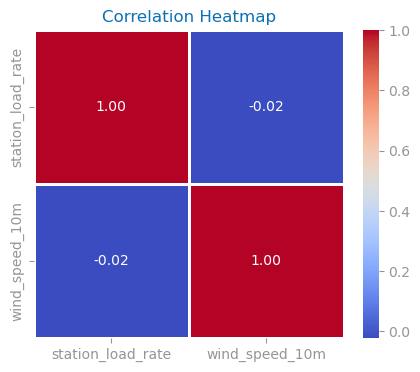

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'wind_speed_10m']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Remove wind_speed_10m column as it has really low correlation with station_load_rate (-0.02)

In [ ]:
df.drop(columns = ['wind_speed_10m'], inplace=True)
df.head()

#### Check if we can remove weather columns - rain_mm

In [123]:
df[['station_load_rate', 'rain_mm']].corr()


,station_load_rate,rain_mm
station_load_rate,1.000000,-0.005376
rain_mm,-0.005376,1.000000


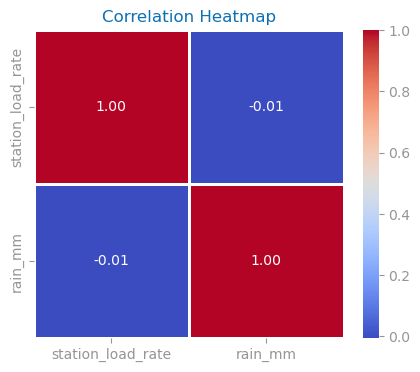

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'rain_mm']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Remove rain_mm column as it has really low correlation with station_load_rate (-0.01)

In [ ]:
df.drop(columns = ['rain_mm'], inplace=True)
df.head()

#### Check if i can remove weather columns - temperature_2m

In [125]:
df[['station_load_rate', 'temperature_2m']].corr()


,station_load_rate,temperature_2m
station_load_rate,1.000000,-0.113901
temperature_2m,-0.113901,1.000000


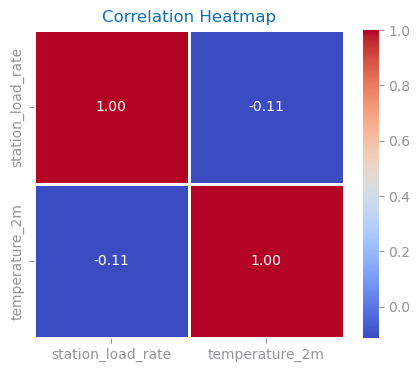

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'temperature_2m']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Kepp col temperature_2m in th df, becasue it has a small negative correlation with the station_load_rate (-0,11)

## Rename original cols from main df 

In [ ]:
#

# Create dataset for data exploration:

# Create dataset for time forecasting (1)

# Create dataset for time forecasting (2) - excluding external variables